In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import gym
import random
import math

In [2]:
# Se acaba de hablar por teléfono con Uber, están teniendo algunos problemas con su nuevo auto sin conductor y quieren que lo arregles.

# Hay 4 ubicaciones representadas por letras diferentes y es su trabajo recoger al pasajero en una ubicación y dejarlo en otra.

# Carguemos nuestro primer entorno Taxi-v3.

env = gym.make("Taxi-v3")

In [3]:
# Podemos ver el estado de nuestro entorno utilizando render.
env.reset()
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [4]:
# ¡Ahora podemos ver nuestro entorno! 
# El cuadrado amarillo representa el taxi 
# "|" representa una pared 
# La letra de color azul representa el lugar de recogida del pasajero 
# La letra de color púrpura representa el destino del pasajero 

# Nota El taxi se volverá verde cuando un pasajero haya sido recogido. 
# Hay seis movimientos posibles que puede tomar un taxi: Arriba 0 Abajo 1 Derecha 2 Izquierda 3 Recogida 4 Devolución 5


# Elige un estado aleatorio y renderízalo
env.env.s = 240
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [5]:
# Nos movemos a la izquierda
env.step(3)
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)


In [6]:
# Nos movemos a la izquierda
env.step(3)
env.render()


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)


In [7]:
# Nos movemos hacia arriba
env.step(1)
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)


In [8]:
# Nos movemos hacia arriba
env.step(1)
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)


In [9]:
# Recogemos al pasagero
env.step(4)
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)


In [10]:
# Nos movemos hacia abajo
env.step(0)
env.render()

+---------+
|R: | : :G|
|_: | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)


In [11]:
# Nos movemos hacia arriba
env.step(1)
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)


In [12]:
# Estos resultados son el 'pan de cada día' del estado de aprendizaje de refuerzo. 
# Situación actual del agente en el entorno. 
# Recompensa. Comentarios de una acción realizada por el agente en el entorno. 
# Listo - Booleano que indica si el agente ha finalizado o completado su información del entorno. 
# Diagnóstico. información sobre la última acción de los agentes. 

# Recibe +20 puntos por una entrega exitosa y pierde 1 punto por cada paso de tiempo que tome. 
# También hay una penalización de 10 puntos por acciones ilegales de recogida y devolución.

#Dejamos el pasajero 

state, reward, done, info = env.step(5)
print('state: {}'.format(state))
print('reward: {}'.format(reward))
print('done: {}'.format(done))
print('info: {}'.format(info))

state: 0
reward: 20
done: True
info: {'prob': 1.0}


In [47]:
#La recompensa es fácil de malinterpretar, normalmente es positiva, sin embargo, en el aprendizaje por refuerzo puede ser positiva o negativa.

#Positivo

# - El agente recibe +20 puntos por una entrega exitosa


#Negativo

# - El agente recibe -10 puntos por cada error que comete al recoger o dejar a un pasajero
# - El agente recibe -1 punto por cada paso que realiza.


# Cada respiro que tomas

# Cada movimiento que haces

# Cada vínculo que rompas

# Cada paso que das

# Te miraré recompensándote (con -1)

# La razón por la que damos una recompensa negativa en cada turno, básicamente obliga al agente a encontrar la solución más rápida posible.

# ¿Ahora que?

# Bueno, tenemos el agente, el entorno y las recompensas. Vamos a explorar.

# Cuando construimos cualquier modelo de aprendizaje automático, queremos comenzar de manera simple.

# Sabemos que nuestro objetivo es recoger y llevar a nuestro pasajero a su destino, seleccionemos acciones aleatorias hasta que lo hagamos bien.

# Use env.action_space.sample () para realizar acciones aleatorias hasta que tenga un viaje exitoso.

# Piense cómo se recompensa un viaje exitoso.


state = env.reset()
reward = None
steps = 0

while reward != 20:
    state, reward, done, info = env.step(env.action_space.sample())
    steps += 1

print('La conducción aleatoria tomó {} pasos para completar un viaje'.format(steps))

La conducción aleatoria tomó 2117 pasos para completar un viaje


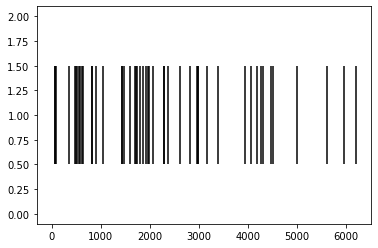

Número promedio de pasos para una unidad aleatoria 2270.5510204081634


In [64]:
# Ejecútelo unas cuantas veces más y vea cuánto tarda.

random_driving_store = []
for i in range(1,50):
    state = env.reset()
    reward = None
    steps = 0

    while reward != 20:
        state, reward, done, info = env.step(env.action_space.sample())
        steps += 1

    random_driving_store.append(steps)
    
from matplotlib import pyplot as plt
import numpy as np

plt.figure()
plt.hlines(0.5,0.5,2)  # Draw a horizontal line
plt.eventplot(random_driving_store, orientation='horizontal', colors='k')

plt.show()
print('Número promedio de pasos para una unidad aleatoria {}'.format(np.mean(random_driving_store)))

In [61]:
# No hay sorpresas aquí, asignar una acción aleatoria no llevará a nuestro taxi a ninguna parte.

# Necesitamos una forma para que nuestro agente aprenda a maniobrar en las calles del gimnasio. Intentemos construir una Q-table.

# Piense en una tabla Q inicialmente como un mapa en blanco del entorno. Su agente navegará por el espacio y actualizará la tabla con todo lo que encuentre interesante.

# Con cada iteración, el agente obtiene cada vez más información sobre el entorno. En poco tiempo, su agente está zumbando por el medio ambiente.


# La tabla Q se compone de filas iguales al número de estados y columnas iguales al número de acciones.

# El valor en la celda indica la recompensa esperada para una acción dado ese estado.

# Construyamos nuestra Q-table 

state_size = env.observation_space.n
action_size = env.action_space.n

print('number of possible states: {}'.format(state_size))
print('number of possible actions: {}'.format(action_size))

number of possible states: 500
number of possible actions: 6


In [75]:
# Ahora tenemos las dimensiones de nuestra tabla Q, inicialicemos nuestra tabla Q como un lienzo en blanco (todos ceros)

Q = np.zeros([state_size, action_size])
Q

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [66]:
total_reward = 0
learning_rate = 0.7

In [98]:
done = False
total_reward, reward = 1,0
state = env.reset()
while done != True: # Keeps making actions until episode completes
        action = np.argmax(Q[state]) # Finds the action with the greatest reward. TIP each state is a row in the Q-table, find the best action at this state by finding the max value
        new_state, reward, done, info = env.step(action) #Takes the action with the greatest reward
        Q[state, action] += learning_rate * (reward + np.max(Q[new_state]) - Q[state, action]) # Updates our Q-table based on the state and actions. TIP If your stuck have a look at this pseudo code below
        total_reward += reward # Update our total reward
        state = new_state # Update our current state
#         env.render() # Print the current agent-environment interaction
print('Total reward for this episode: {}'.format(total_reward))


# New Q value = Current Q value + learning rate * (Reward + (maximum value of new state) — Current Q value )

Total reward for this episode: -496


In [73]:
Q = np.zeros([state_size, action_size])

total_reward = 0
learning_rate = 0.7

for episode in range(1,2001):
    done = False
    total_reward, reward = 0,0
    state = env.reset()
    while done != True:
        action = np.argmax(Q[state])
        new_state, reward, done, info = env.step(action)
        Q[state, action] += learning_rate * (reward + np.max(Q[new_state]) - Q[state, action])
        total_reward += reward
        state = new_state   
    if episode % 50 == 0:
        print('Episode {} Total Reward: {}'.format(episode, total_reward))

Episode 50 Total Reward: -22
Episode 100 Total Reward: -323
Episode 150 Total Reward: -54
Episode 200 Total Reward: 13
Episode 250 Total Reward: 12
Episode 300 Total Reward: 11
Episode 350 Total Reward: 7
Episode 400 Total Reward: 8
Episode 450 Total Reward: 8
Episode 500 Total Reward: 4
Episode 550 Total Reward: 8
Episode 600 Total Reward: 14
Episode 650 Total Reward: 5
Episode 700 Total Reward: 10
Episode 750 Total Reward: 9
Episode 800 Total Reward: 0
Episode 850 Total Reward: 7
Episode 900 Total Reward: 7
Episode 950 Total Reward: 6
Episode 1000 Total Reward: 3
Episode 1050 Total Reward: 7
Episode 1100 Total Reward: 5
Episode 1150 Total Reward: 5
Episode 1200 Total Reward: 12
Episode 1250 Total Reward: 6
Episode 1300 Total Reward: 7
Episode 1350 Total Reward: 10
Episode 1400 Total Reward: 4
Episode 1450 Total Reward: 10
Episode 1500 Total Reward: 8
Episode 1550 Total Reward: 7
Episode 1600 Total Reward: 11
Episode 1650 Total Reward: 5
Episode 1700 Total Reward: 5
Episode 1750 Total